# Soil moisture

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\\monsoon.csv')

In [3]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

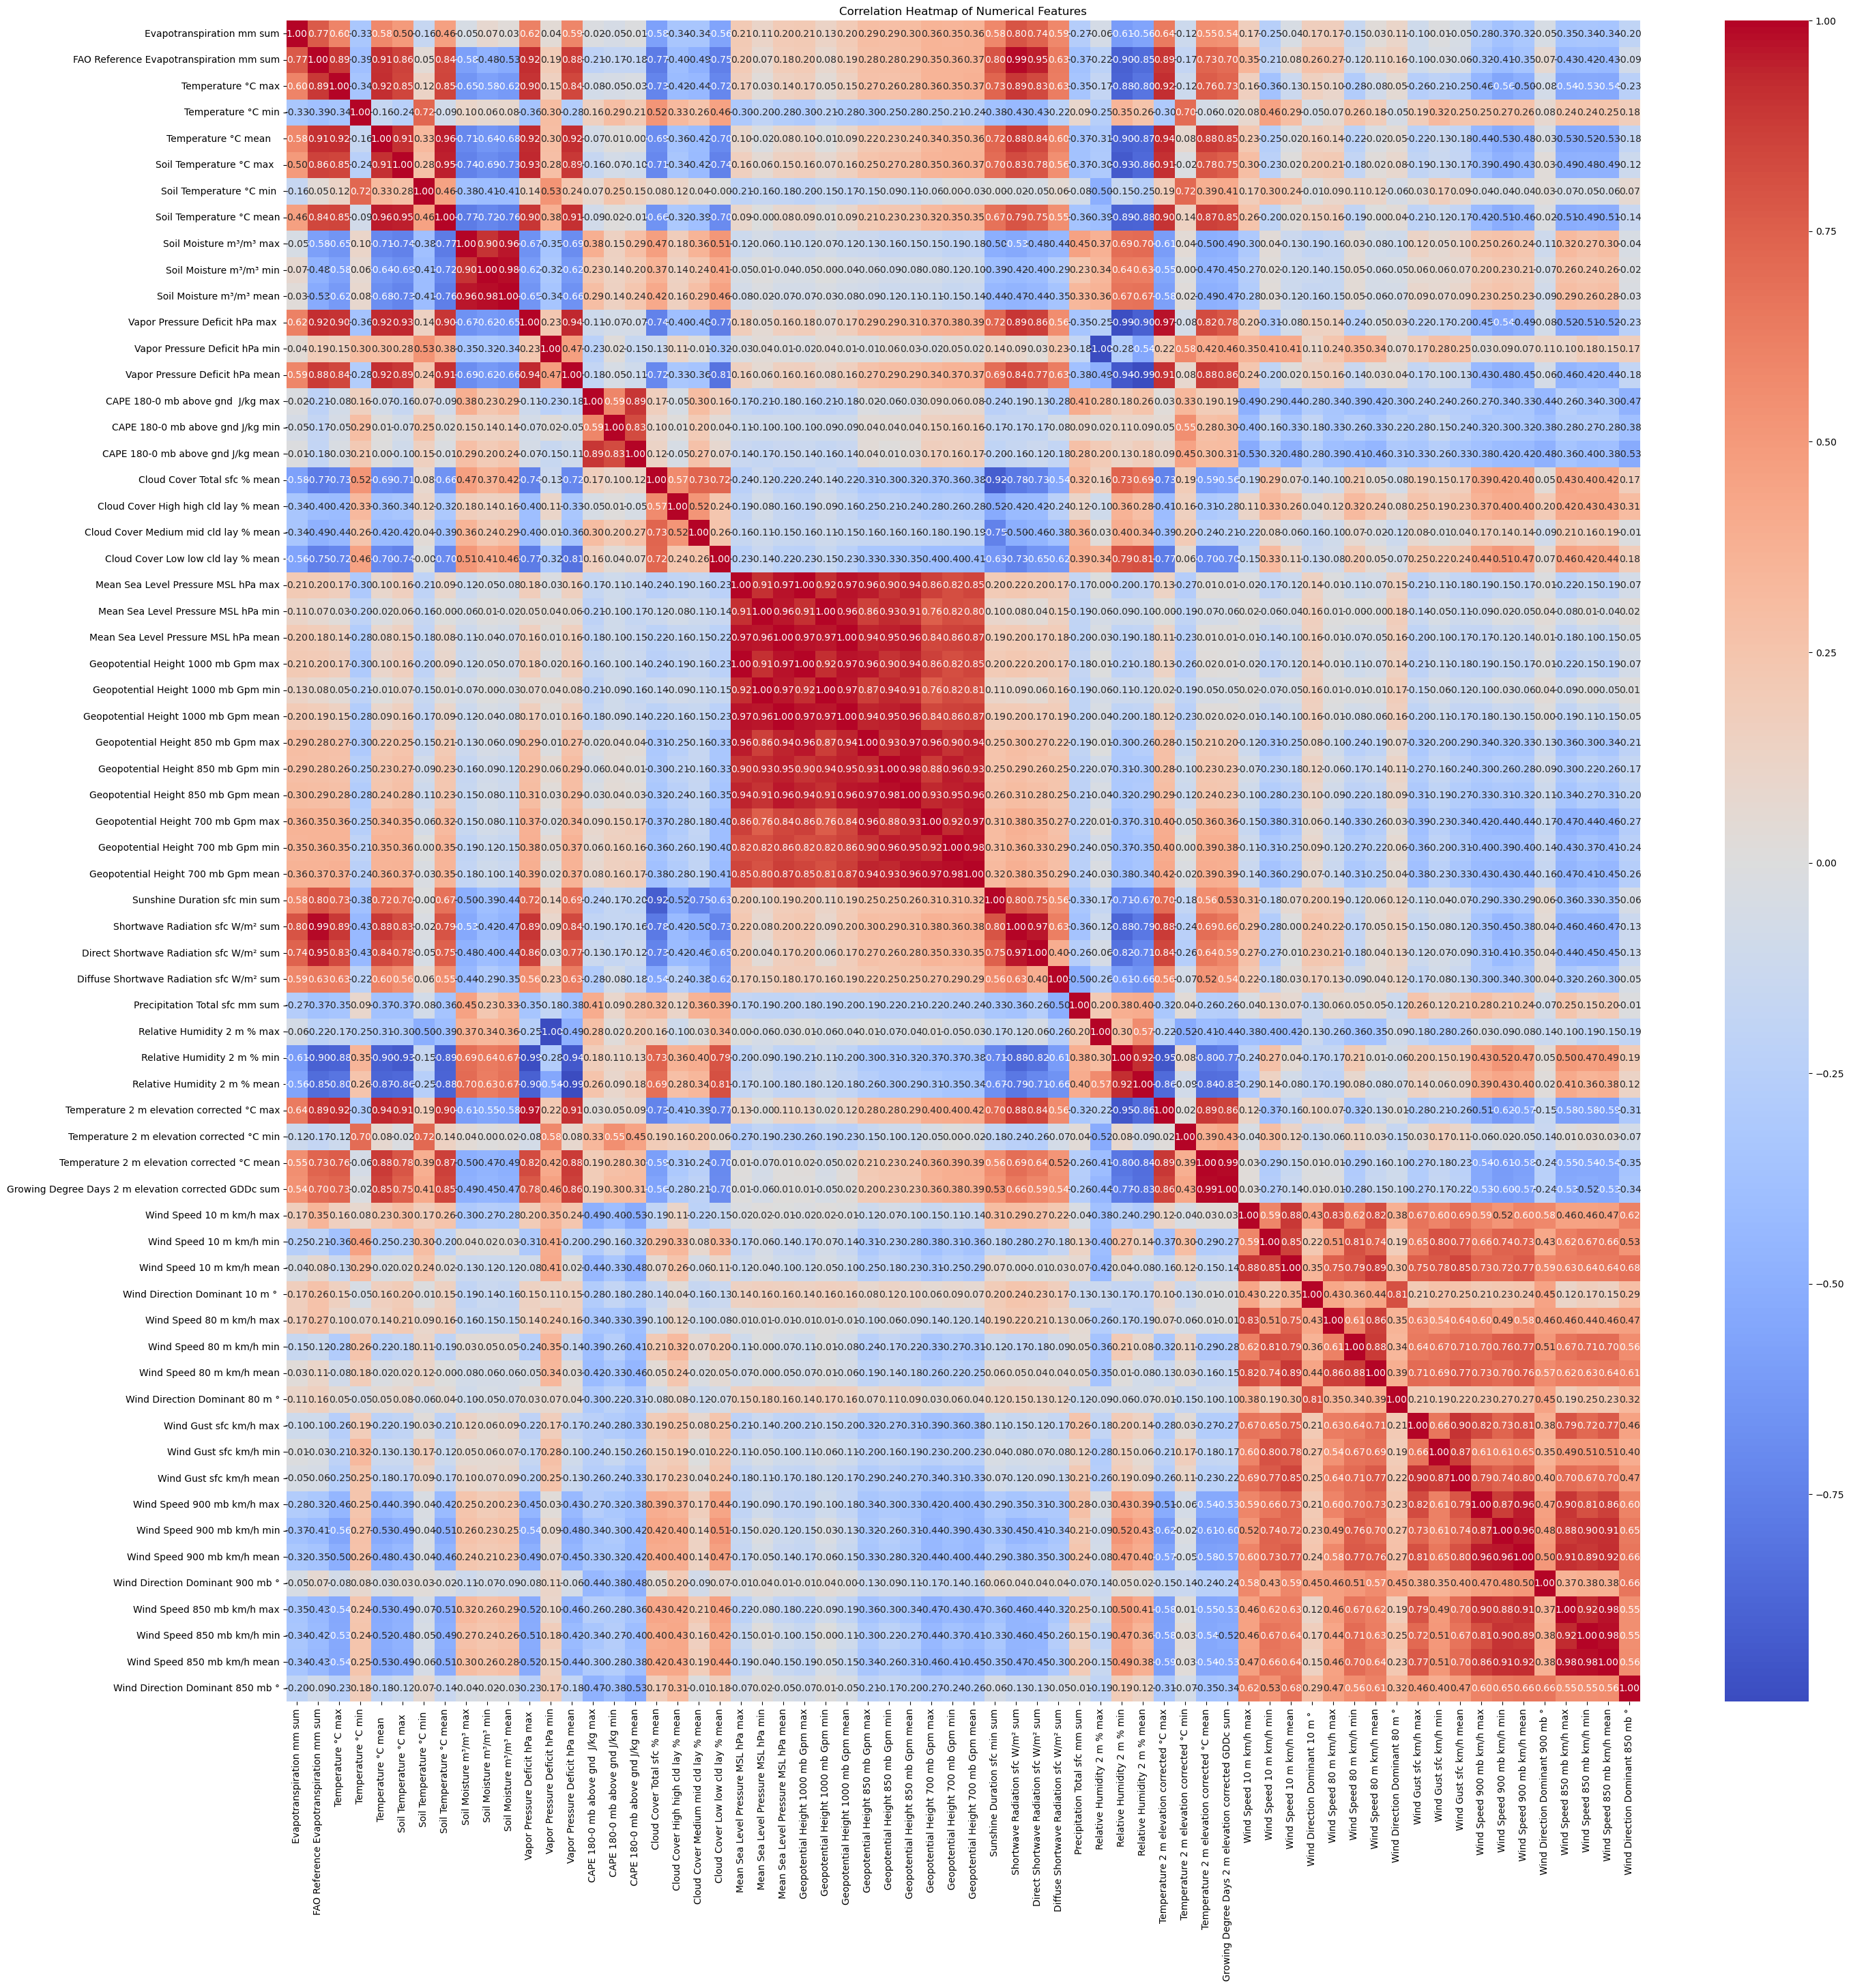

In [4]:
# Determine the number of numerical features
num_features = len(numerical_columns.columns)

# Set figsize based on the number of features
figsize = (max(8, num_features/2), max(6, num_features/2))

# Create a heatmap
plt.figure(figsize=figsize)  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [57]:
# Extract correlation values between 'Soil Moisture m³/m³ mean' and other features
soil_moisture_correlation = correlation_matrix['Soil Moisture m³/m³ mean'].drop('Soil Moisture m³/m³ mean')

# Sort correlation values in descending order
soil_moisture_correlation_sorted = soil_moisture_correlation.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(soil_moisture_correlation_sorted)

Soil Moisture m³/m³ min                       0.982914
Soil Moisture m³/m³ max                       0.961768
Soil Temperature °C mean                      0.759480
Soil Temperature °C max                       0.725929
Temperature °C mean                           0.680965
                                                ...   
Evapotranspiration mm sum                     0.032731
Geopotential Height 1000 mb Gpm min           0.031113
Wind Direction Dominant 850 mb °              0.028059
Temperature 2 m elevation corrected °C min    0.021047
Mean Sea Level Pressure MSL hPa min           0.019286
Name: Soil Moisture m³/m³ mean, Length: 63, dtype: float64


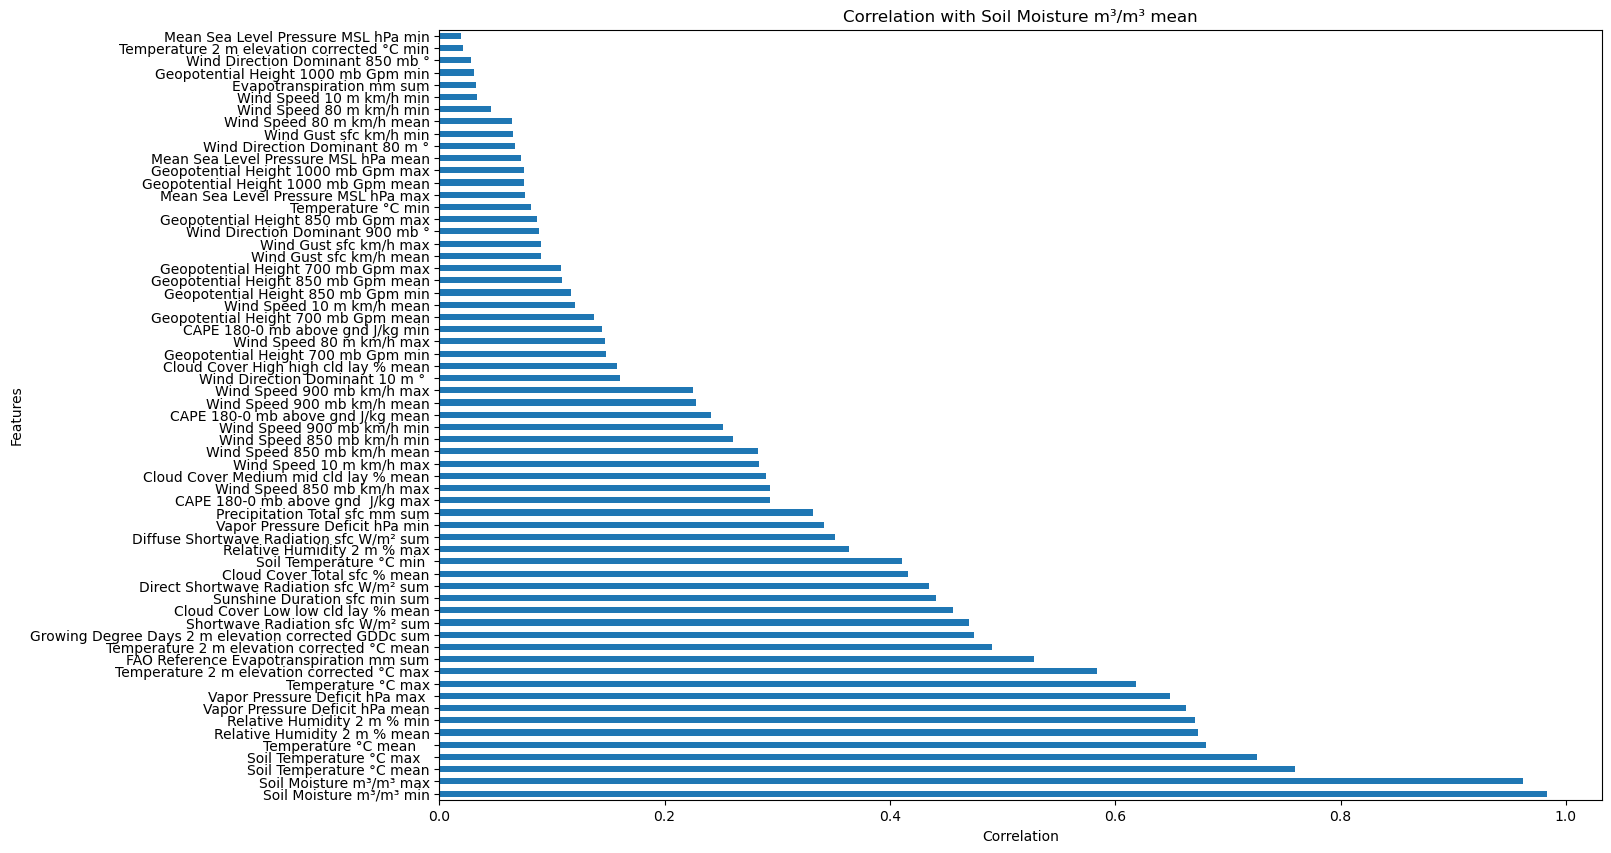

In [58]:
plt.figure(figsize=(15, 10))
soil_moisture_correlation_sorted.plot(kind='barh')  # Horizontal bar chart
plt.title('Correlation with Soil Moisture m³/m³ mean')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [59]:
# Define the threshold
threshold = 0.5

# Filter features with correlation values above the threshold
selected_features = soil_moisture_correlation_sorted[soil_moisture_correlation_sorted > threshold]

# Print the selected features
print("Selected features with correlation above 0.5:")
print(selected_features)


Selected features with correlation above 0.5:
Soil Moisture m³/m³ min                       0.982914
Soil Moisture m³/m³ max                       0.961768
Soil Temperature °C mean                      0.759480
Soil Temperature °C max                       0.725929
Temperature °C mean                           0.680965
Relative Humidity 2 m % mean                  0.673100
Relative Humidity 2 m % min                   0.670471
Vapor Pressure Deficit hPa mean               0.662916
Vapor Pressure Deficit hPa max                0.648842
Temperature °C max                            0.618671
Temperature 2 m elevation corrected °C max    0.584036
FAO Reference Evapotranspiration mm sum       0.527830
Name: Soil Moisture m³/m³ mean, dtype: float64


In [60]:
from sklearn.model_selection import train_test_split
# 1. Prepare the Data
X = df[selected_features.index]  # Features
y = df['Soil Moisture m³/m³ mean']  # Target variable

In [61]:
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Iterate over models
for name, model in models.items():
    
    # Train the Model
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R^2
    print(f"Mean Squared Error for {name}: {mse}")
    print(f"Root Mean Squared Error for {name}: {rmse}")
    print(f"R^2 for {name}: {r2}")
rf_pred=y_pred

Mean Squared Error for Random Forest: 2.0046698269157682e-05
Root Mean Squared Error for Random Forest: 0.004477353936105307
R^2 for Random Forest: 0.9935905176850897
Mean Squared Error for Gradient Boosting: 1.7481703464157152e-05
Root Mean Squared Error for Gradient Boosting: 0.004181112706464291
R^2 for Gradient Boosting: 0.9944106172655668
Mean Squared Error for XGBoost: 2.031346616401352e-05
Root Mean Squared Error for XGBoost: 0.0045070462793290154
R^2 for XGBoost: 0.9935052246317745


In [63]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

# Initialize base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor(max_depth=4)

# AdaBoost Regressor
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)

# Evaluate AdaBoost
mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = np.sqrt(mse_ab)  # Calculate RMSE
r2_ab = r2_score(y_test, y_pred_ab)  # Calculate R^2
print("AdaBoost:")
print("Mean Squared Error:", mse_ab)
print("Root Mean Squared Error:", rmse_ab)
print("R^2 Score:", r2_ab)

# LightGBM Regressor
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate LightGBM
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("\nLightGBM:")
print("Mean Squared Error:", mse_lgbm)
print("Root Mean Squared Error:", rmse_lgbm)
print("R^2 Score:", r2_lgbm)

# SVR (Support Vector Regressor)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSVR:")
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R^2 Score:", r2_svr)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost:
Mean Squared Error: 3.659337037802684e-05
Root Mean Squared Error: 0.006049245438732573
R^2 Score: 0.9883000902626553
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2781
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 12
[LightGBM] [Info] Start training from score 0.307880

LightGBM:
Mean Squared Error: 2.1421827158302753e-05
Root Mean Squared Error: 0.004628371977089002
R^2 Score: 0.993150851053839

SVR:
Mean Squared Error: 0.002267861488033833
Root Mean Squared Error: 0.04762206933800581
R^2 Score: 0.2749021357505582


In [64]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)  # Calculate RMSE
r2_knn = r2_score(y_test, y_pred_knn)  # Calculate R^2
print("K-Nearest Neighbors (KNN):")
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("R^2 Score:", r2_knn)

K-Nearest Neighbors (KNN):
Mean Squared Error: 0.0011386538801738233
Root Mean Squared Error: 0.03374394582993849
R^2 Score: 0.635940950984101


In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined and contain your meteorological data and precipitation values

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for precipitation prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Neural Network Regression:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

nn_pred=y_pred

Epoch 1/100
54/54 [==============================] - 1s 3ms/step - loss: 0.0927
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 8.3666e-04
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 7.1392e-04
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 6.1987e-04
Epoch 11/100
54/54 [==============================] - 0s 2ms/step - loss: 5.8025e-04
Epoch 12/100
54/54 [==============================] - 0s 2ms/step - loss: 5.2803e-04
Epoch 13/100
54/5

54/54 [==============================] - 0s 2ms/step - loss: 3.5989e-04
Epoch 98/100
54/54 [==============================] - 0s 2ms/step - loss: 1.3847e-04
Epoch 99/100
54/54 [==============================] - 0s 2ms/step - loss: 5.1986e-05
Epoch 100/100
14/14 [==============================] - 0s 2ms/step
Neural Network Regression:
Mean Squared Error: 0.0001403714980826676
Root Mean Squared Error: 0.011847847824928695
R^2 Score: 0.9551193606848186


In [66]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Ridge Regressor
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R^2 Score:", r2_ridge)

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R^2 Score:", r2_dt)


Ridge:
Mean Squared Error: 8.842889589161475e-05
Root Mean Squared Error: 0.009403663961010875
R^2 Score: 0.9717268431571913

Decision Tree:
Mean Squared Error: 3.663120171886497e-05
Root Mean Squared Error: 0.006052371578056404
R^2 Score: 0.9882879945396192


In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define Polynomial Regression model pipeline
poly_regression = make_pipeline(PolynomialFeatures(degree=2), Ridge())

# Fit Polynomial Regression model
poly_regression.fit(X_train, y_train)

# Predict with Polynomial Regression
y_pred_poly = poly_regression.predict(X_test)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("\nPolynomial Regression:")
print("Mean Squared Error:", mse_poly)
print("Root Mean Squared Error:", rmse_poly)
print("R^2 Score:", r2_poly)


Polynomial Regression:
Mean Squared Error: 1.1026840930469569e-05
Root Mean Squared Error: 0.0033206687474768644
R^2 Score: 0.9964744148395792


In [68]:
from sklearn.ensemble import BaggingRegressor

# Bagging with Decision Tree Regressor
bagging_dt = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                               n_estimators=10,  # Number of base estimators (Decision Trees)
                               random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt.predict(X_test)

# Evaluate Bagging with Decision Tree
mse_bagging_dt = mean_squared_error(y_test, y_pred_bagging_dt)
rmse_bagging_dt = np.sqrt(mse_bagging_dt)
r2_bagging_dt = r2_score(y_test, y_pred_bagging_dt)
print("\nBagging with Decision Tree:")
print("Mean Squared Error:", mse_bagging_dt)
print("Root Mean Squared Error:", rmse_bagging_dt)
print("R^2 Score:", r2_bagging_dt)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging with Decision Tree:
Mean Squared Error: 2.730184981166704e-05
Root Mean Squared Error: 0.0052251172055435315
R^2 Score: 0.9912708456433723


# Cloud Cover

In [69]:
# Extract correlation values between 'Cloud Cover Total sfc % mean' and other features
cloud_cover_correlation = correlation_matrix['Cloud Cover Total sfc % mean'].drop('Cloud Cover Total sfc % mean')

# Sort correlation values in descending order
cloud_cover_correlation_sorted = cloud_cover_correlation.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(cloud_cover_correlation_sorted)

Sunshine Duration sfc min sum                 0.916207
Shortwave Radiation sfc W/m² sum              0.777865
FAO Reference Evapotranspiration mm sum       0.774753
Vapor Pressure Deficit hPa max                0.744560
Temperature 2 m elevation corrected °C max    0.734356
                                                ...   
Soil Temperature °C min                       0.084958
Wind Direction Dominant 80 m °                0.080366
Wind Speed 10 m km/h mean                     0.068560
Wind Direction Dominant 900 mb °              0.048698
Wind Speed 80 m km/h mean                     0.047520
Name: Cloud Cover Total sfc % mean, Length: 63, dtype: float64


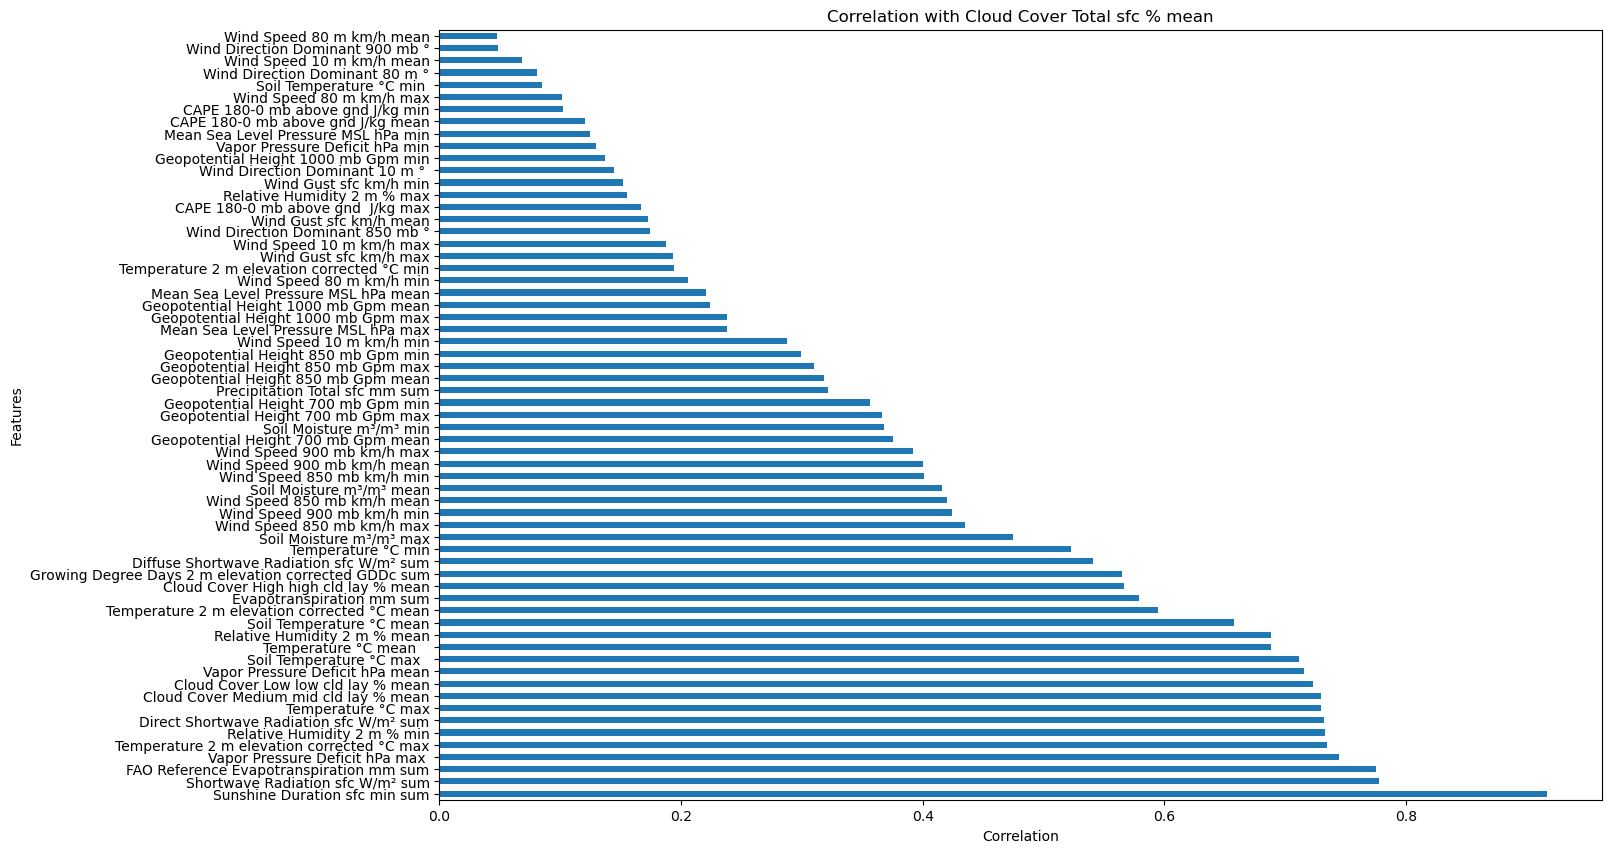

In [70]:
plt.figure(figsize=(15, 10))
cloud_cover_correlation_sorted.plot(kind='barh')  # Horizontal bar chart
plt.title('Correlation with Cloud Cover Total sfc % mean')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [71]:
# Define the threshold
threshold = 0.5

# Filter features with correlation values above the threshold
selected_features = cloud_cover_correlation_sorted[cloud_cover_correlation_sorted> threshold]

# Print the selected features
print("Selected features with correlation above 0.5:")
print(selected_features)


Selected features with correlation above 0.5:
Sunshine Duration sfc min sum                           0.916207
Shortwave Radiation sfc W/m² sum                        0.777865
FAO Reference Evapotranspiration mm sum                 0.774753
Vapor Pressure Deficit hPa max                          0.744560
Temperature 2 m elevation corrected °C max              0.734356
Relative Humidity 2 m % min                             0.732812
Direct Shortwave Radiation sfc W/m² sum                 0.732431
Temperature °C max                                      0.729744
Cloud Cover Medium mid cld lay % mean                   0.729439
Cloud Cover Low low cld lay % mean                      0.722878
Vapor Pressure Deficit hPa mean                         0.715111
Soil Temperature °C max                                 0.711350
Temperature °C mean                                     0.688198
Relative Humidity 2 m % mean                            0.688112
Soil Temperature °C mean                    

In [72]:
from sklearn.model_selection import train_test_split
# 1. Prepare the Data
X = df[selected_features.index]  # Features
y = df['Cloud Cover Total sfc % mean']  # Target variable

In [73]:
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Iterate over models
for name, model in models.items():
    
    # Train the Model
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R^2
    print(f"Mean Squared Error for {name}: {mse}")
    print(f"Root Mean Squared Error for {name}: {rmse}")
    print(f"R^2 for {name}: {r2}")
rf_pred=y_pred

Mean Squared Error for Random Forest: 17.031898547465666
Root Mean Squared Error for Random Forest: 4.126972079802051
R^2 for Random Forest: 0.969297161016519
Mean Squared Error for Gradient Boosting: 19.7306303943255
Root Mean Squared Error for Gradient Boosting: 4.4419174231772365
R^2 for Gradient Boosting: 0.9644322465665641
Mean Squared Error for XGBoost: 17.4727682385379
Root Mean Squared Error for XGBoost: 4.180044047439919
R^2 for XGBoost: 0.968502419837198


In [75]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

# Initialize base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor(max_depth=4)

# AdaBoost Regressor
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)

# Evaluate AdaBoost
mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = np.sqrt(mse_ab)  # Calculate RMSE
r2_ab = r2_score(y_test, y_pred_ab)  # Calculate R^2
print("AdaBoost:")
print("Mean Squared Error:", mse_ab)
print("Root Mean Squared Error:", rmse_ab)
print("R^2 Score:", r2_ab)

# LightGBM Regressor
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate LightGBM
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("\nLightGBM:")
print("Mean Squared Error:", mse_lgbm)
print("Root Mean Squared Error:", rmse_lgbm)
print("R^2 Score:", r2_lgbm)

# SVR (Support Vector Regressor)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSVR:")
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R^2 Score:", r2_svr)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost:
Mean Squared Error: 27.856283412333685
Root Mean Squared Error: 5.277905210624162
R^2 Score: 0.9497844011985171
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5150
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 21
[LightGBM] [Info] Start training from score 74.798224

LightGBM:
Mean Squared Error: 14.468836551375741
Root Mean Squared Error: 3.8037923906774593
R^2 Score: 0.9739175079233139

SVR:
Mean Squared Error: 192.34924192768185
Root Mean Squared Error: 13.869002917574207
R^2 Score: 0.6532583970576189


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)  # Calculate RMSE
r2_knn = r2_score(y_test, y_pred_knn)  # Calculate R^2
print("K-Nearest Neighbors (KNN):")
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("R^2 Score:", r2_knn)

K-Nearest Neighbors (KNN):
Mean Squared Error: 102.31370166770411
Root Mean Squared Error: 10.115023562389961
R^2 Score: 0.8155624812258606


In [77]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Ridge Regressor
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R^2 Score:", r2_ridge)

# Lasso Regressor
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R^2 Score:", r2_lasso)

# Elastic Net Regressor
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)

# Evaluate Elastic Net
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print("\nElastic Net:")
print("Mean Squared Error:", mse_elastic_net)
print("Root Mean Squared Error:", rmse_elastic_net)
print("R^2 Score:", r2_elastic_net)

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R^2 Score:", r2_dt)


Ridge:
Mean Squared Error: 35.1967738133175
Root Mean Squared Error: 5.932686896619229
R^2 Score: 0.9365519424556995

Lasso:
Mean Squared Error: 44.594178876818276
Root Mean Squared Error: 6.677887306388023
R^2 Score: 0.9196115518278944

Elastic Net:
Mean Squared Error: 44.3967361280532
Root Mean Squared Error: 6.6630875821989015
R^2 Score: 0.9199674753267866

Decision Tree:
Mean Squared Error: 43.11761923691436
Root Mean Squared Error: 6.566400782537901
R^2 Score: 0.9222732969496809


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.618e+03, tolerance: 9.309e+01
  model = cd_fast.enet_coordinate_descent(


In [78]:
from sklearn.ensemble import BaggingRegressor

# Bagging with Decision Tree Regressor
bagging_dt = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                               n_estimators=10,  # Number of base estimators (Decision Trees)
                               random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt.predict(X_test)

# Evaluate Bagging with Decision Tree
mse_bagging_dt = mean_squared_error(y_test, y_pred_bagging_dt)
rmse_bagging_dt = np.sqrt(mse_bagging_dt)
r2_bagging_dt = r2_score(y_test, y_pred_bagging_dt)
print("\nBagging with Decision Tree:")
print("Mean Squared Error:", mse_bagging_dt)
print("Root Mean Squared Error:", rmse_bagging_dt)
print("R^2 Score:", r2_bagging_dt)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging with Decision Tree:
Mean Squared Error: 19.588419443144065
Root Mean Squared Error: 4.425880640408648
R^2 Score: 0.9646886055346289


In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define Polynomial Regression model pipeline
poly_regression = make_pipeline(PolynomialFeatures(degree=2), Ridge())

# Fit Polynomial Regression model
poly_regression.fit(X_train, y_train)

# Predict with Polynomial Regression
y_pred_poly = poly_regression.predict(X_test)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("\nPolynomial Regression:")
print("Mean Squared Error:", mse_poly)
print("Root Mean Squared Error:", rmse_poly)
print("R^2 Score:", r2_poly)


Polynomial Regression:
Mean Squared Error: 15.367596230338673
Root Mean Squared Error: 3.9201525774309696
R^2 Score: 0.9722973436397409


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.40177e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined and contain your meteorological data and precipitation values

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for precipitation prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Neural Network Regression:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

nn_pred=y_pred

Epoch 1/100
54/54 [==============================] - 1s 2ms/step - loss: 5502.7793
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 2968.6179
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 1334.3408
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 836.4402
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 489.4650
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 313.8593
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 223.0315
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 173.1394
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 141.4177
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 119.0733
Epoch 11/100
54/54 [==============================] - 0s 2ms/step - loss: 103.8008
Epoch 12/100
54/54 [==============================] - 0s 2ms/step - loss: 91.7315
Epoch 13/10

14/14 [==============================] - 0s 2ms/step
Neural Network Regression:
Mean Squared Error: 15.82203245504583
Root Mean Squared Error: 3.9776918501872203
R^2 Score: 0.9714781465199035


# Evapotranspiration

In [30]:
# Extract correlation values between 'Evapotranspiration mm sum' and other features
evapotranspiration_correlation = correlation_matrix['Evapotranspiration mm sum'].drop('Evapotranspiration mm sum')

# Sort correlation values in descending order
evapotranspiration_correlation_sorted = evapotranspiration_correlation.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(evapotranspiration_correlation_sorted)

Shortwave Radiation sfc W/m² sum              0.796027
FAO Reference Evapotranspiration mm sum       0.767476
Direct Shortwave Radiation sfc W/m² sum       0.738456
Temperature 2 m elevation corrected °C max    0.640054
Vapor Pressure Deficit hPa max                0.615825
                                                ...   
Soil Moisture m³/m³ mean                      0.032731
Wind Speed 80 m km/h mean                     0.027201
CAPE 180-0 mb above gnd  J/kg max             0.021177
Wind Gust sfc km/h min                        0.009986
CAPE 180-0 mb above gnd J/kg mean             0.005860
Name: Evapotranspiration mm sum, Length: 63, dtype: float64


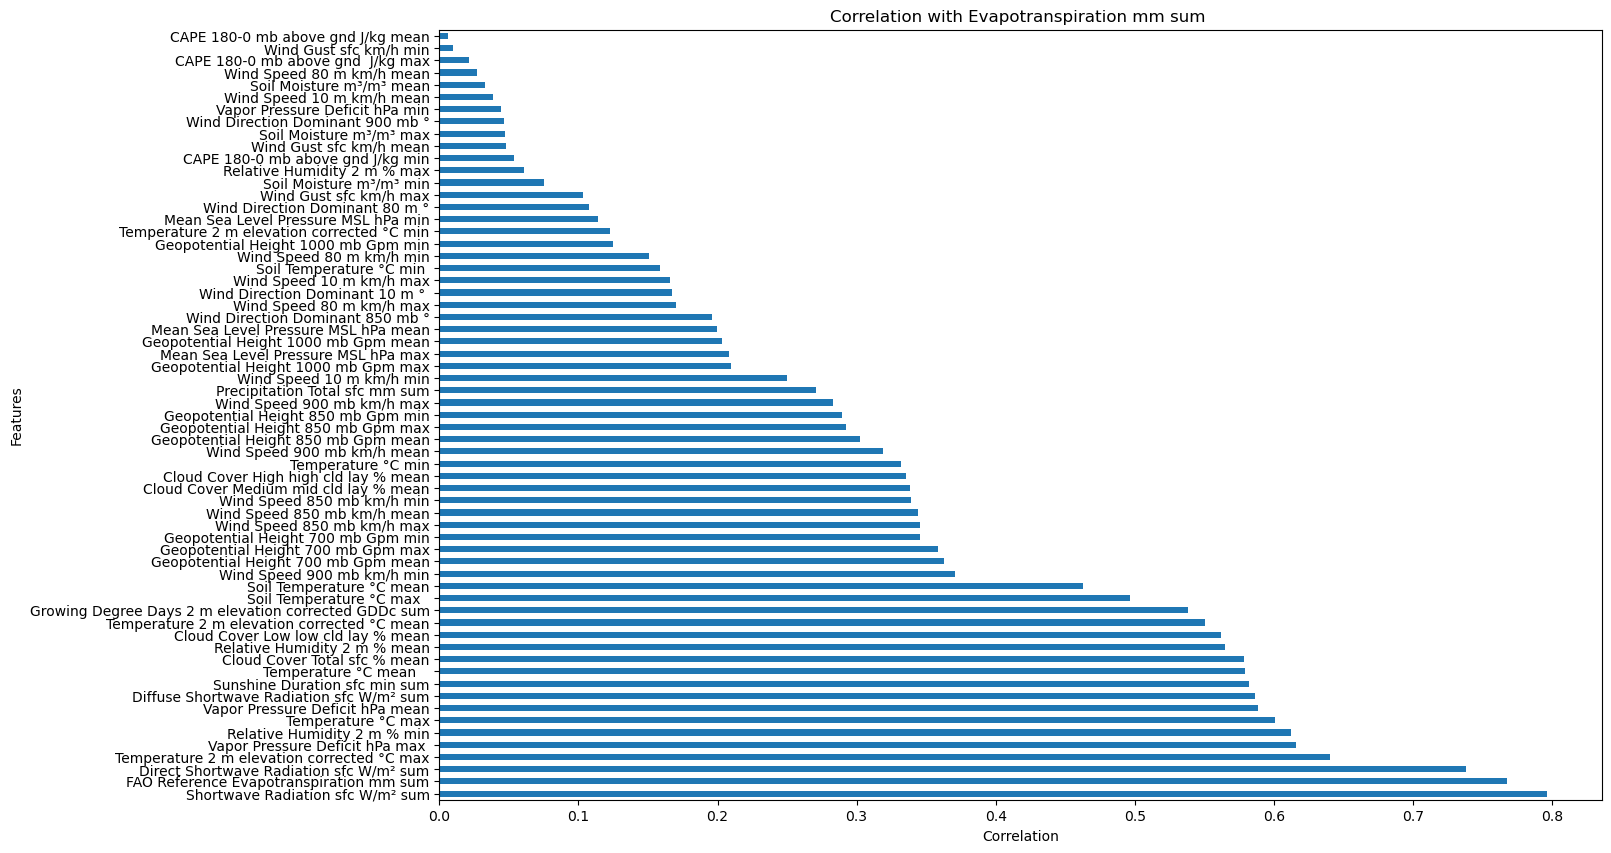

In [31]:
plt.figure(figsize=(15, 10))
evapotranspiration_correlation_sorted.plot(kind='barh')  # Horizontal bar chart
plt.title('Correlation with Evapotranspiration mm sum ')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [35]:
# Define the threshold
threshold = 0.49

# Filter features with correlation values above the threshold
selected_features =evapotranspiration_correlation_sorted[evapotranspiration_correlation_sorted> threshold]

# Print the selected features
print("Selected features with correlation above 0.49:")
print(selected_features)


Selected features with correlation above 0.49:
Shortwave Radiation sfc W/m² sum                        0.796027
FAO Reference Evapotranspiration mm sum                 0.767476
Direct Shortwave Radiation sfc W/m² sum                 0.738456
Temperature 2 m elevation corrected °C max              0.640054
Vapor Pressure Deficit hPa max                          0.615825
Relative Humidity 2 m % min                             0.611967
Temperature °C max                                      0.600496
Vapor Pressure Deficit hPa mean                         0.588431
Diffuse Shortwave Radiation sfc W/m² sum                0.586283
Sunshine Duration sfc min sum                           0.582150
Temperature °C mean                                     0.579407
Cloud Cover Total sfc % mean                            0.578841
Relative Humidity 2 m % mean                            0.564521
Cloud Cover Low low cld lay % mean                      0.562178
Temperature 2 m elevation corrected °C mean

In [36]:
from sklearn.model_selection import train_test_split
# 1. Prepare the Data
X = df[selected_features.index]  # Features
y = df['Evapotranspiration mm sum']  # Target variable

In [37]:
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Iterate over models
for name, model in models.items():
    
    # Train the Model
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R^2
    print(f"Mean Squared Error for {name}: {mse}")
    print(f"Root Mean Squared Error for {name}: {rmse}")
    print(f"R^2 for {name}: {r2}")
rf_pred=y_pred

Mean Squared Error for Random Forest: 0.047279762817725925
Root Mean Squared Error for Random Forest: 0.2174391014001988
R^2 for Random Forest: 0.8823686304580998
Mean Squared Error for Gradient Boosting: 0.04708025548477856
Root Mean Squared Error for Gradient Boosting: 0.21697985041191856
R^2 for Gradient Boosting: 0.8828650018315926
Mean Squared Error for XGBoost: 0.043593643597062644
Root Mean Squared Error for XGBoost: 0.20879090879888101
R^2 for XGBoost: 0.8915396420364146


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

# Initialize base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor(max_depth=4)

# AdaBoost Regressor
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)

# Evaluate AdaBoost
mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = np.sqrt(mse_ab)  # Calculate RMSE
r2_ab = r2_score(y_test, y_pred_ab)  # Calculate R^2
print("AdaBoost:")
print("Mean Squared Error:", mse_ab)
print("Root Mean Squared Error:", rmse_ab)
print("R^2 Score:", r2_ab)

# LightGBM Regressor
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate LightGBM
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("\nLightGBM:")
print("Mean Squared Error:", mse_lgbm)
print("Root Mean Squared Error:", rmse_lgbm)
print("R^2 Score:", r2_lgbm)

# SVR (Support Vector Regressor)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSVR:")
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R^2 Score:", r2_svr)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost:
Mean Squared Error: 0.06430774585364081
Root Mean Squared Error: 0.25358971953460735
R^2 Score: 0.8400032536948316
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4129
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 17
[LightGBM] [Info] Start training from score 1.599204

LightGBM:
Mean Squared Error: 0.03695511852712816
Root Mean Squared Error: 0.19223714138305367
R^2 Score: 0.9080561968830446

SVR:
Mean Squared Error: 0.12911248294555383
Root Mean Squared Error: 0.3593222550101146
R^2 Score: 0.6787700003404704


In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)  # Calculate RMSE
r2_knn = r2_score(y_test, y_pred_knn)  # Calculate R^2
print("K-Nearest Neighbors (KNN):")
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("R^2 Score:", r2_knn)

K-Nearest Neighbors (KNN):
Mean Squared Error: 0.14769185446809927
Root Mean Squared Error: 0.3843069794683662
R^2 Score: 0.6325447913467102


In [41]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Ridge Regressor
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R^2 Score:", r2_ridge)

# Lasso Regressor
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R^2 Score:", r2_lasso)

# Elastic Net Regressor
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)

# Evaluate Elastic Net
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print("\nElastic Net:")
print("Mean Squared Error:", mse_elastic_net)
print("Root Mean Squared Error:", rmse_elastic_net)
print("R^2 Score:", r2_elastic_net)

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R^2 Score:", r2_dt)


Ridge:
Mean Squared Error: 0.03302760449469866
Root Mean Squared Error: 0.18173498423445789
R^2 Score: 0.9178277952793992

Lasso:
Mean Squared Error: 0.13294411545571452
Root Mean Squared Error: 0.3646150236286411
R^2 Score: 0.6692369537918001

Elastic Net:
Mean Squared Error: 0.12891484378879622
Root Mean Squared Error: 0.35904713310204306
R^2 Score: 0.6792617237184859

Decision Tree:
Mean Squared Error: 0.10585105662106234
Root Mean Squared Error: 0.3253475935381455
R^2 Score: 0.7366440943074155


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define Polynomial Regression model pipeline
poly_regression = make_pipeline(PolynomialFeatures(degree=2), Ridge())

# Fit Polynomial Regression model
poly_regression.fit(X_train, y_train)

# Predict with Polynomial Regression
y_pred_poly = poly_regression.predict(X_test)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("\nPolynomial Regression:")
print("Mean Squared Error:", mse_poly)
print("Root Mean Squared Error:", rmse_poly)
print("R^2 Score:", r2_poly)


Polynomial Regression:
Mean Squared Error: 0.021461489301168393
Root Mean Squared Error: 0.14649740373524847
R^2 Score: 0.9466041234462625


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.09352e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [43]:
from sklearn.ensemble import BaggingRegressor

# Bagging with Decision Tree Regressor
bagging_dt = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                               n_estimators=10,  # Number of base estimators (Decision Trees)
                               random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt.predict(X_test)

# Evaluate Bagging with Decision Tree
mse_bagging_dt = mean_squared_error(y_test, y_pred_bagging_dt)
rmse_bagging_dt = np.sqrt(mse_bagging_dt)
r2_bagging_dt = r2_score(y_test, y_pred_bagging_dt)
print("\nBagging with Decision Tree:")
print("Mean Squared Error:", mse_bagging_dt)
print("Root Mean Squared Error:", rmse_bagging_dt)
print("R^2 Score:", r2_bagging_dt)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging with Decision Tree:
Mean Squared Error: 0.05370145869526476
Root Mean Squared Error: 0.2317357518711016
R^2 Score: 0.8663915435220109


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined and contain your meteorological data and precipitation values

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for precipitation prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Neural Network Regression:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

nn_pred=y_pred

Epoch 1/100
54/54 [==============================] - 1s 3ms/step - loss: 0.7690
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.1853
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.1208
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0909
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0757
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0458
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 11/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 12/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0364
Epoch 13/100
54/54 [=================

# Relative Humidity

In [45]:
# Extract correlation values between 'Relative Humidity 2 m % max' and other features
relative_humidity_correlation = correlation_matrix['Relative Humidity 2 m % mean'].drop('Relative Humidity 2 m % mean')

# Sort correlation values in descending order
relative_humidity_correlation_sorted = relative_humidity_correlation.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(relative_humidity_correlation_sorted)


Vapor Pressure Deficit hPa mean     0.988620
Relative Humidity 2 m % min         0.917369
Vapor Pressure Deficit hPa max      0.895271
Soil Temperature °C mean            0.883334
Temperature °C mean                 0.873995
                                      ...   
Wind Speed 80 m km/h mean           0.081108
Wind Speed 10 m km/h mean           0.077758
Wind Direction Dominant 80 m °      0.073140
Wind Gust sfc km/h min              0.060903
Wind Direction Dominant 900 mb °    0.023157
Name: Relative Humidity 2 m % mean, Length: 63, dtype: float64


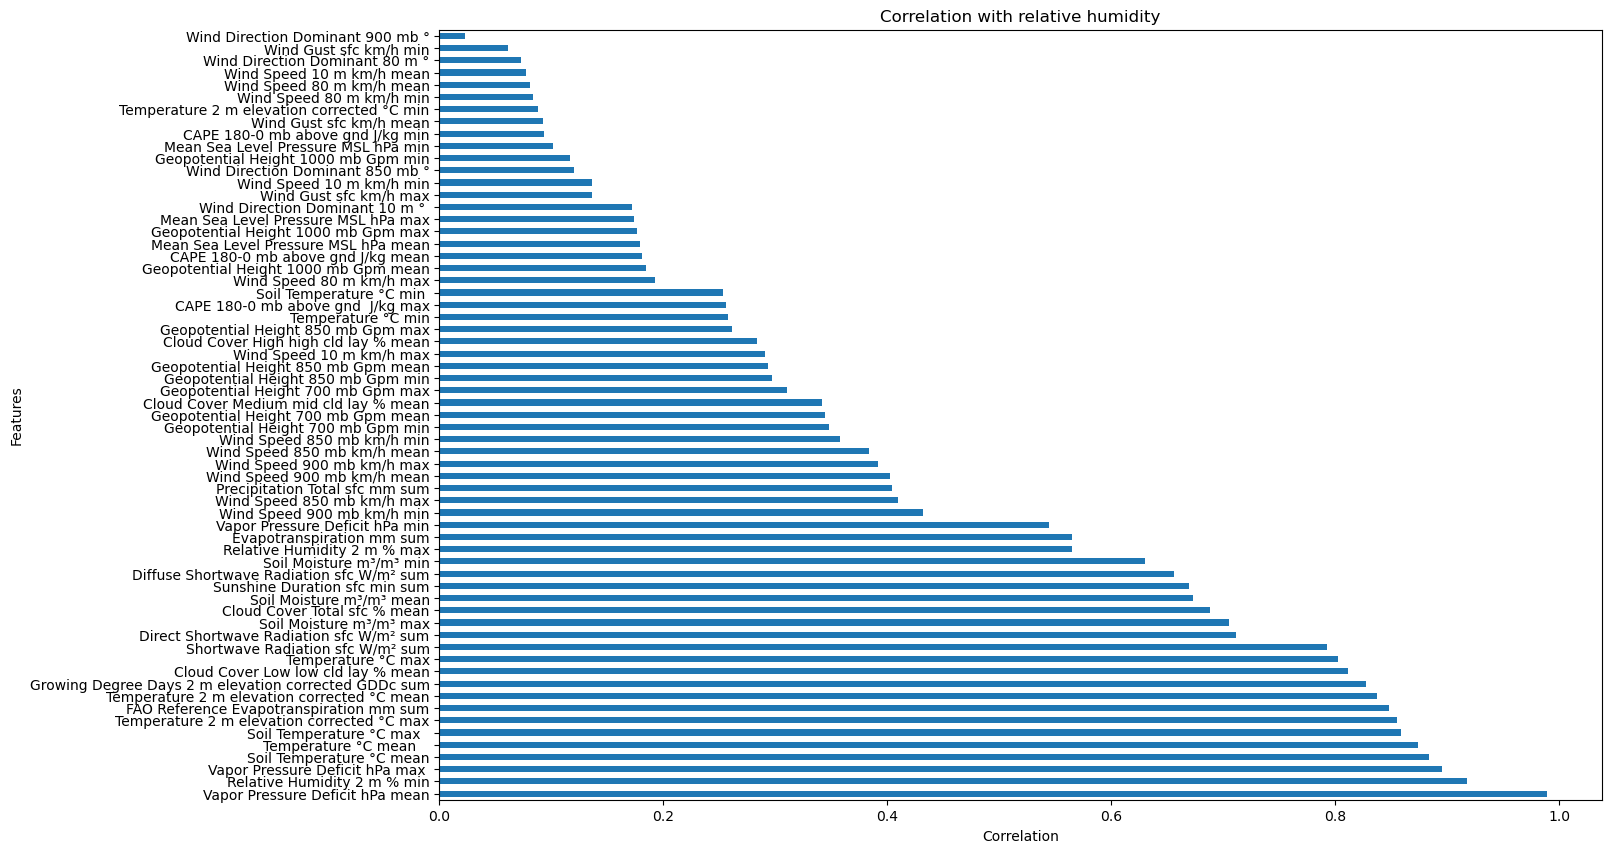

In [46]:
plt.figure(figsize=(15, 10))
relative_humidity_correlation_sorted .plot(kind='barh')  # Horizontal bar chart
plt.title('Correlation with relative humidity')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [47]:
# Define the threshold
threshold = 0.49

# Filter features with correlation values above the threshold
selected_features =relative_humidity_correlation_sorted[relative_humidity_correlation_sorted> threshold]

# Print the selected features
print("Selected features with correlation above 0.49:")
print(selected_features)


Selected features with correlation above 0.49:
Vapor Pressure Deficit hPa mean                         0.988620
Relative Humidity 2 m % min                             0.917369
Vapor Pressure Deficit hPa max                          0.895271
Soil Temperature °C mean                                0.883334
Temperature °C mean                                     0.873995
Soil Temperature °C max                                 0.858432
Temperature 2 m elevation corrected °C max              0.855259
FAO Reference Evapotranspiration mm sum                 0.847658
Temperature 2 m elevation corrected °C mean             0.836960
Growing Degree Days 2 m elevation corrected GDDc sum    0.827714
Cloud Cover Low low cld lay % mean                      0.811340
Temperature °C max                                      0.802218
Shortwave Radiation sfc W/m² sum                        0.792994
Direct Shortwave Radiation sfc W/m² sum                 0.711584
Soil Moisture m³/m³ max                    

In [48]:
from sklearn.model_selection import train_test_split
# 1. Prepare the Data
X = df[selected_features.index]  # Features
y = df['Relative Humidity 2 m % mean']  # Target variable

In [49]:
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Iterate over models
for name, model in models.items():
    
    # Train the Model
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R^2
    print(f"Mean Squared Error for {name}: {mse}")
    print(f"Root Mean Squared Error for {name}: {rmse}")
    print(f"R^2 for {name}: {r2}")
rf_pred=y_pred

Mean Squared Error for Random Forest: 0.10520564297519731
Root Mean Squared Error for Random Forest: 0.32435419370681384
R^2 for Random Forest: 0.9968225475222374
Mean Squared Error for Gradient Boosting: 0.09143774879962417
Root Mean Squared Error for Gradient Boosting: 0.3023867536775118
R^2 for Gradient Boosting: 0.9972383696038729
Mean Squared Error for XGBoost: 0.07819687037601382
Root Mean Squared Error for XGBoost: 0.2796370332699405
R^2 for XGBoost: 0.9976382745972274


In [51]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

# Initialize base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor(max_depth=4)

# AdaBoost Regressor
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)

# Evaluate AdaBoost
mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = np.sqrt(mse_ab)  # Calculate RMSE
r2_ab = r2_score(y_test, y_pred_ab)  # Calculate R^2
print("AdaBoost:")
print("Mean Squared Error:", mse_ab)
print("Root Mean Squared Error:", rmse_ab)
print("R^2 Score:", r2_ab)

# LightGBM Regressor
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate LightGBM
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("\nLightGBM:")
print("Mean Squared Error:", mse_lgbm)
print("Root Mean Squared Error:", rmse_lgbm)
print("R^2 Score:", r2_lgbm)

# SVR (Support Vector Regressor)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSVR:")
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R^2 Score:", r2_svr)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost:
Mean Squared Error: 0.2339276239008623
Root Mean Squared Error: 0.4836606495269822
R^2 Score: 0.9929348475313615
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5347
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 23
[LightGBM] [Info] Start training from score 82.701036

LightGBM:
Mean Squared Error: 0.09998690589160741
Root Mean Squared Error: 0.31620706173583063
R^2 Score: 0.9969801653895695

SVR:
Mean Squared Error: 10.534182559088661
Root Mean Squared Error: 3.2456405468086977
R^2 Score: 0.6818434493911036


In [52]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)  # Calculate RMSE
r2_knn = r2_score(y_test, y_pred_knn)  # Calculate R^2
print("K-Nearest Neighbors (KNN):")
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("R^2 Score:", r2_knn)

K-Nearest Neighbors (KNN):
Mean Squared Error: 10.69139089142647
Root Mean Squared Error: 3.2697692413114523
R^2 Score: 0.677095396045434


In [53]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Ridge Regressor
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R^2 Score:", r2_ridge)

# Lasso Regressor
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R^2 Score:", r2_lasso)

# Elastic Net Regressor
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)

# Evaluate Elastic Net
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print("\nElastic Net:")
print("Mean Squared Error:", mse_elastic_net)
print("Root Mean Squared Error:", rmse_elastic_net)
print("R^2 Score:", r2_elastic_net)

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R^2 Score:", r2_dt)


Ridge:
Mean Squared Error: 0.03406239641685338
Root Mean Squared Error: 0.18456000763126712
R^2 Score: 0.998971237256553

Lasso:
Mean Squared Error: 1.9917379235863717
Root Mean Squared Error: 1.4112894542177985
R^2 Score: 0.9398449320646682

Elastic Net:
Mean Squared Error: 1.3321082346495017
Root Mean Squared Error: 1.1541699331768704
R^2 Score: 0.9597672663639069

Decision Tree:
Mean Squared Error: 0.23732930355781828
Root Mean Squared Error: 0.48716455490708505
R^2 Score: 0.9928321089790474


In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define Polynomial Regression model pipeline
poly_regression = make_pipeline(PolynomialFeatures(degree=2), Ridge())

# Fit Polynomial Regression model
poly_regression.fit(X_train, y_train)

# Predict with Polynomial Regression
y_pred_poly = poly_regression.predict(X_test)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("\nPolynomial Regression:")
print("Mean Squared Error:", mse_poly)
print("Root Mean Squared Error:", rmse_poly)
print("R^2 Score:", r2_poly)


Polynomial Regression:
Mean Squared Error: 0.009265699095410342
Root Mean Squared Error: 0.09625850141888945
R^2 Score: 0.9997201545685543


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.3329e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [55]:
from sklearn.ensemble import BaggingRegressor

# Bagging with Decision Tree Regressor
bagging_dt = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                               n_estimators=10,  # Number of base estimators (Decision Trees)
                               random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt.predict(X_test)

# Evaluate Bagging with Decision Tree
mse_bagging_dt = mean_squared_error(y_test, y_pred_bagging_dt)
rmse_bagging_dt = np.sqrt(mse_bagging_dt)
r2_bagging_dt = r2_score(y_test, y_pred_bagging_dt)
print("\nBagging with Decision Tree:")
print("Mean Squared Error:", mse_bagging_dt)
print("Root Mean Squared Error:", rmse_bagging_dt)
print("R^2 Score:", r2_bagging_dt)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging with Decision Tree:
Mean Squared Error: 0.13454046856315105
Root Mean Squared Error: 0.3667975852744277
R^2 Score: 0.9959365682951425


In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined and contain your meteorological data and precipitation values

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for precipitation prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Neural Network Regression:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

nn_pred=y_pred

Epoch 1/100
54/54 [==============================] - 1s 3ms/step - loss: 6023.6538
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 2935.9812
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 1492.6353
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 1010.4903
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 579.7361
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 330.1285
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 224.5909
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 180.6130
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 150.2805
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 126.3619
Epoch 11/100
54/54 [==============================] - 0s 2ms/step - loss: 108.8512
Epoch 12/100
54/54 [==============================] - 0s 2ms/step - loss: 92.8737
Epoch 13/1